In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore
import numpy as np

In [3]:
data=pd.read_csv("co2_emissions.csv")
data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [4]:
data.tail()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS,Z,12.2,8.7,10.7,26,248


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [6]:
data.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

# There are no null values in the given data

In [7]:
data.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [8]:
data.duplicated().sum()

np.int64(1112)

In [9]:
data[data.duplicated(keep=False)]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
12,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM,Z,9.7,6.9,8.4,34,193
13,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A,Z,18.0,12.6,15.6,18,359
15,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M,X,7.9,5.9,7.0,40,163


In [10]:
duplicates=data[data.duplicated(keep=False)]
duplicates.sort_values(by=duplicates.columns.tolist())

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
3313,ACURA,ILX,COMPACT,2.4,4,AM,Z,9.4,6.8,8.2,34,192
4371,ACURA,ILX,COMPACT,2.4,4,AM,Z,9.4,6.8,8.2,34,192
5454,ACURA,ILX,COMPACT,2.4,4,AM,Z,9.9,7.0,8.6,33,199
6503,ACURA,ILX,COMPACT,2.4,4,AM,Z,9.9,7.0,8.6,33,199
3316,ACURA,MDX HYBRID AWD,SUV - SMALL,3.0,6,AM,Z,9.1,9.0,9.0,31,210
...,...,...,...,...,...,...,...,...,...,...,...,...
5445,VOLVO,V60 POLESTAR,STATION WAGON - SMALL,2.0,4,AS,Z,11.8,8.5,10.3,27,241
3310,VOLVO,XC90 T5,SUV - STANDARD,2.0,4,AS,Z,10.6,9.1,10.0,28,232
4368,VOLVO,XC90 T5,SUV - STANDARD,2.0,4,AS,Z,10.6,9.1,10.0,28,232
3311,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,10.8,9.5,10.2,28,239


In [11]:
data=data.drop_duplicates()
data

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


In [12]:
data.reset_index(drop=True,inplace=True)

In [13]:
data

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
6268,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
6269,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
6270,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
6271,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


<Axes: >

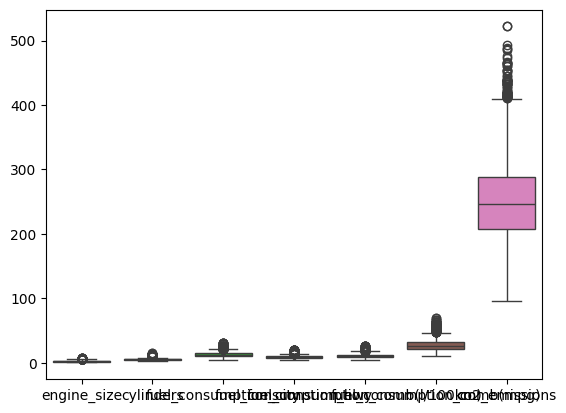

In [14]:
sns.boxplot(data)

In [15]:
numericData=data.select_dtypes(include=['number'])
numericData

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
6268,2.0,4,10.7,7.7,9.4,30,219
6269,2.0,4,11.2,8.3,9.9,29,232
6270,2.0,4,11.7,8.6,10.3,27,240
6271,2.0,4,11.2,8.3,9.9,29,232


In [16]:
q1 = numericData['co2_emissions'].quantile(0.25)
q3 = numericData['co2_emissions'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = numericData['co2_emissions'][(numericData['co2_emissions'] < lower_bound) | (numericData['co2_emissions'] > upper_bound)]
print({len(outliers)})
print(outliers)
print("minimum outlier for co2 emissions column is ",min(outliers))
print("maximum outlier for co2 emissions column is ",max(outliers))

{74}
75      437
223     414
224     432
225     411
226     419
       ... 
4891    522
5286    413
5321    487
5322    493
6112    485
Name: co2_emissions, Length: 74, dtype: int64
minimum outlier for co2 emissions column is  411
maximum outlier for co2 emissions column is  522


In [17]:
objectData=data.select_dtypes(include='object')
objectData

,make,model,vehicle_class,transmission,fuel_type
0,ACURA,ILX,COMPACT,AS,Z
1,ACURA,ILX,COMPACT,M,Z
2,ACURA,ILX HYBRID,COMPACT,AV,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS,Z
4,ACURA,RDX AWD,SUV - SMALL,AS,Z
...,...,...,...,...,...
6268,VOLVO,XC40 T5 AWD,SUV - SMALL,AS,Z
6269,VOLVO,XC60 T5 AWD,SUV - SMALL,AS,Z
6270,VOLVO,XC60 T6 AWD,SUV - SMALL,AS,Z
6271,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS,Z


# Bar chart for object Data

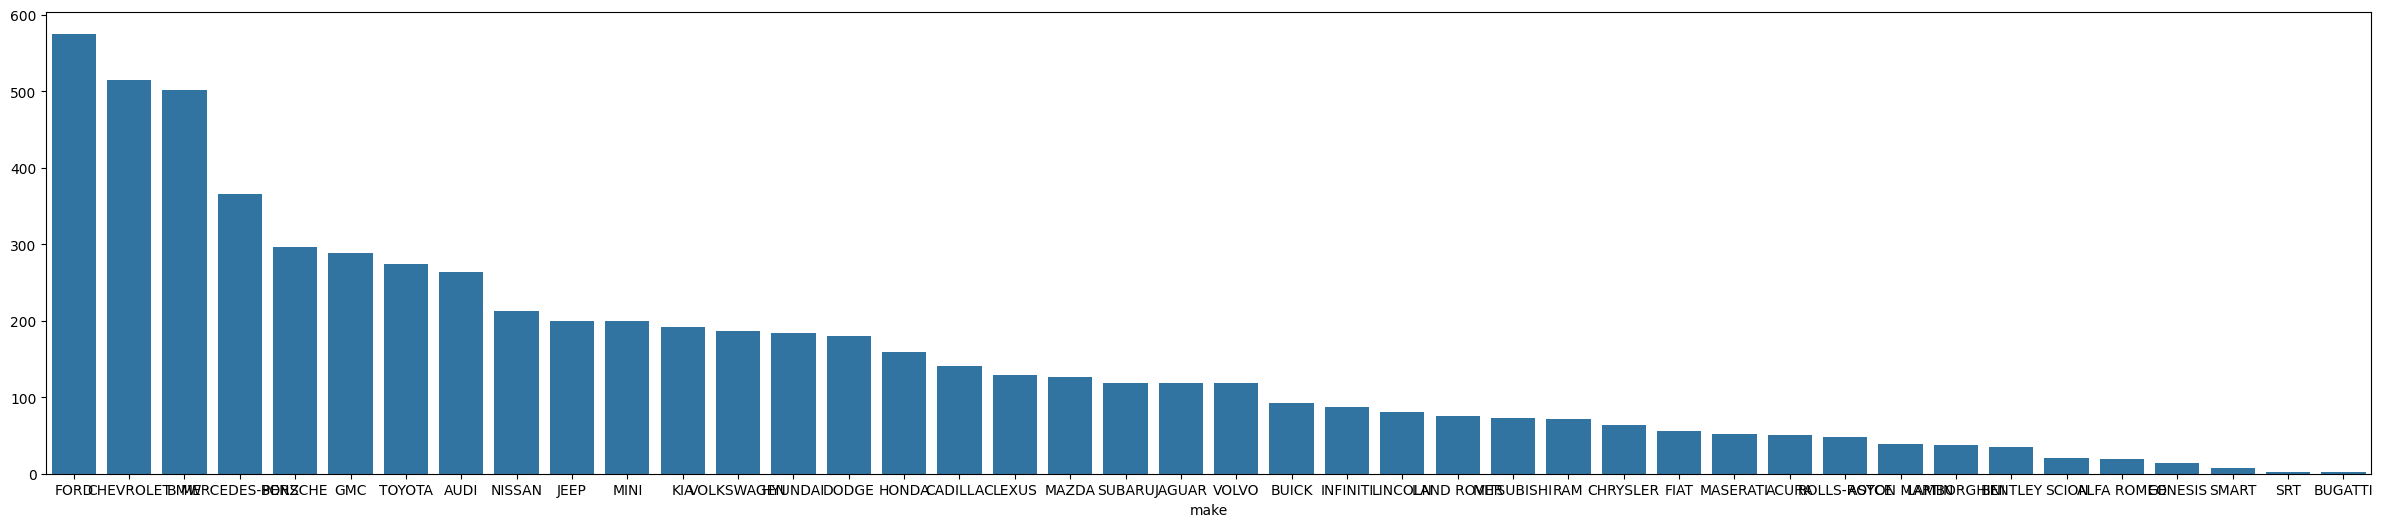

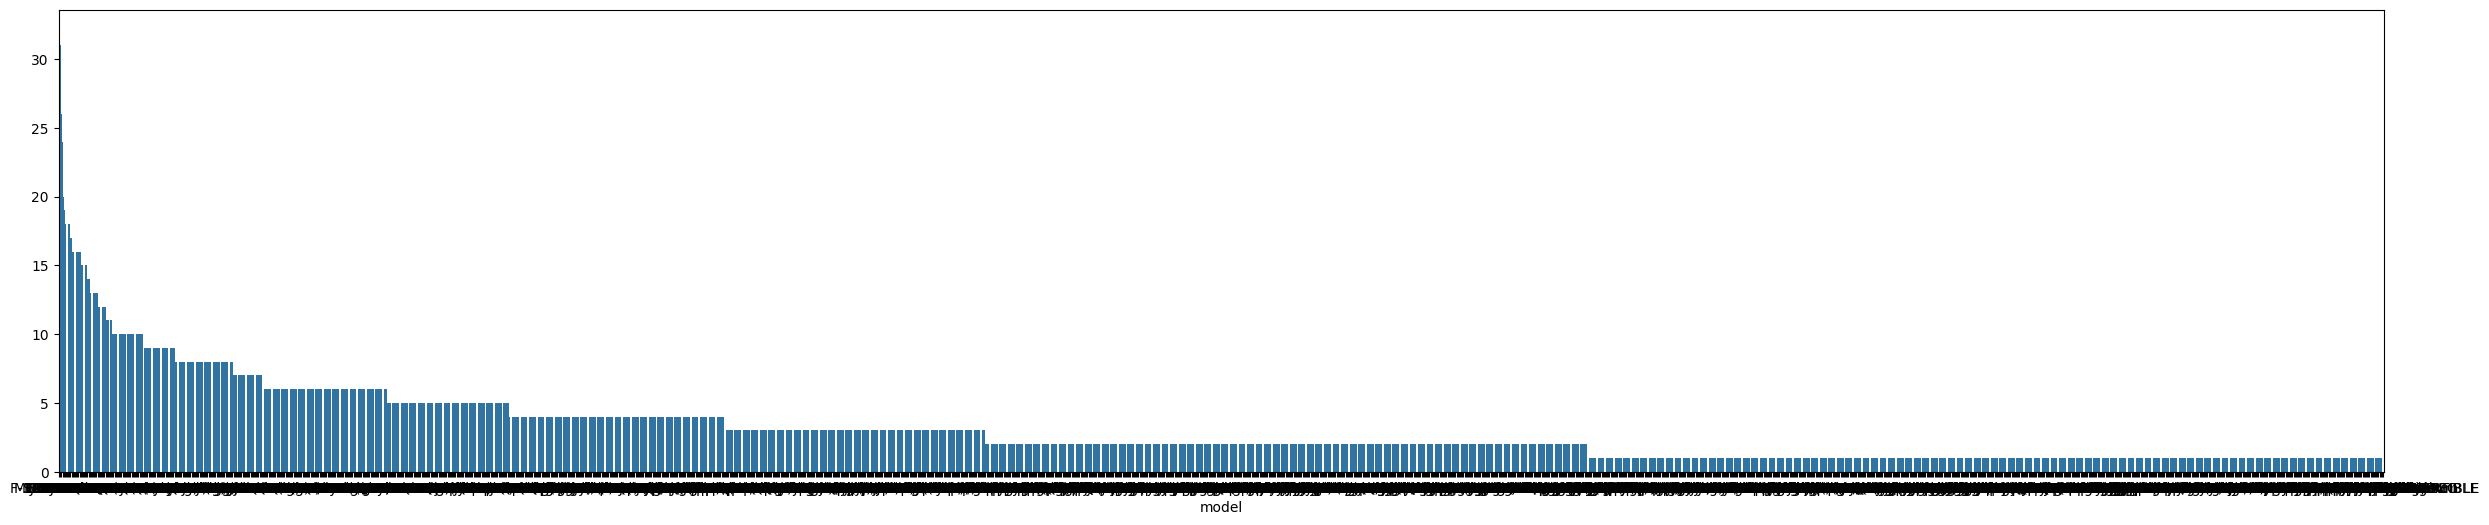

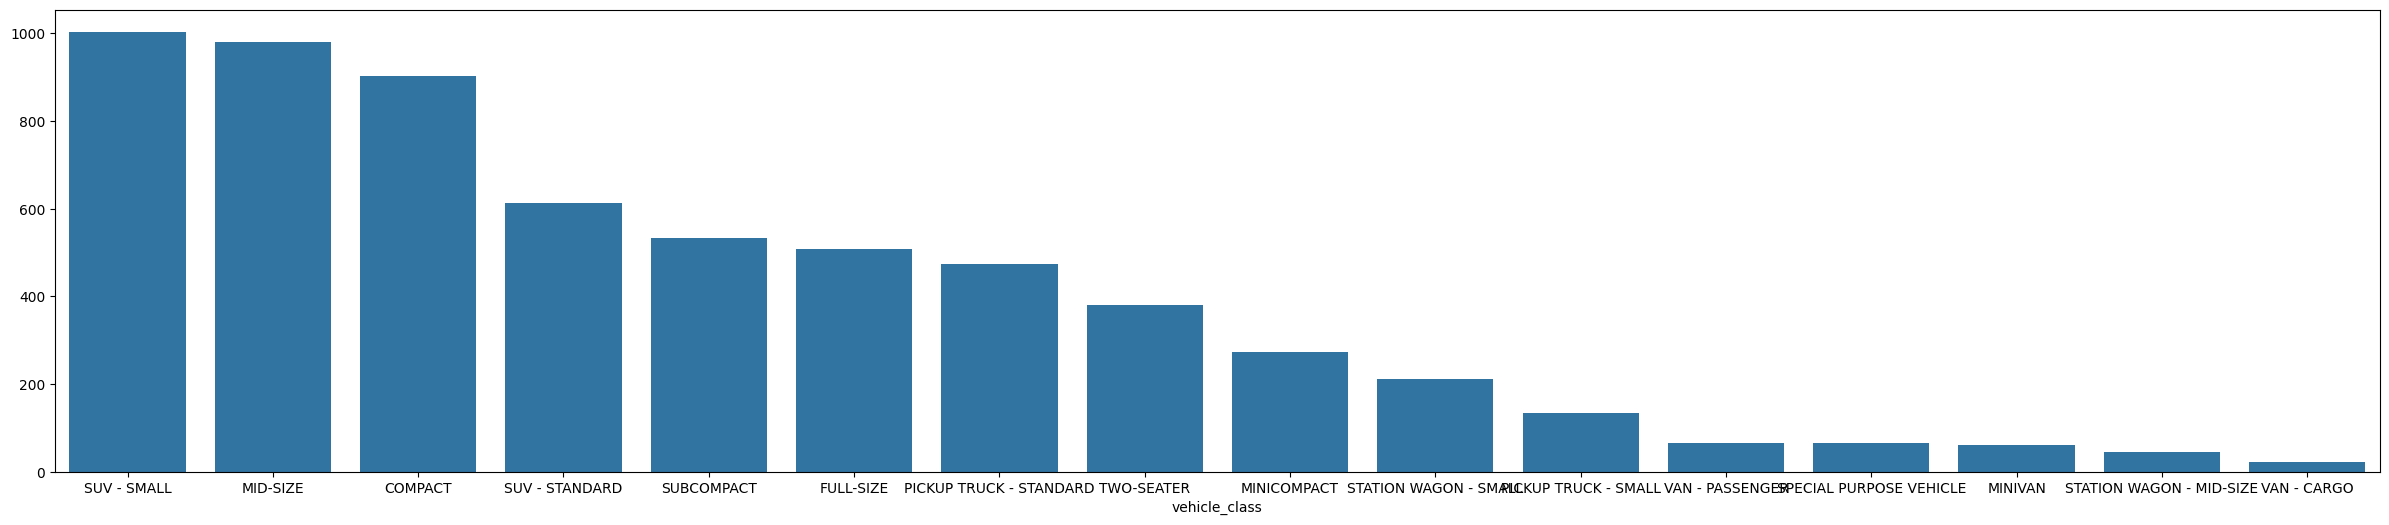

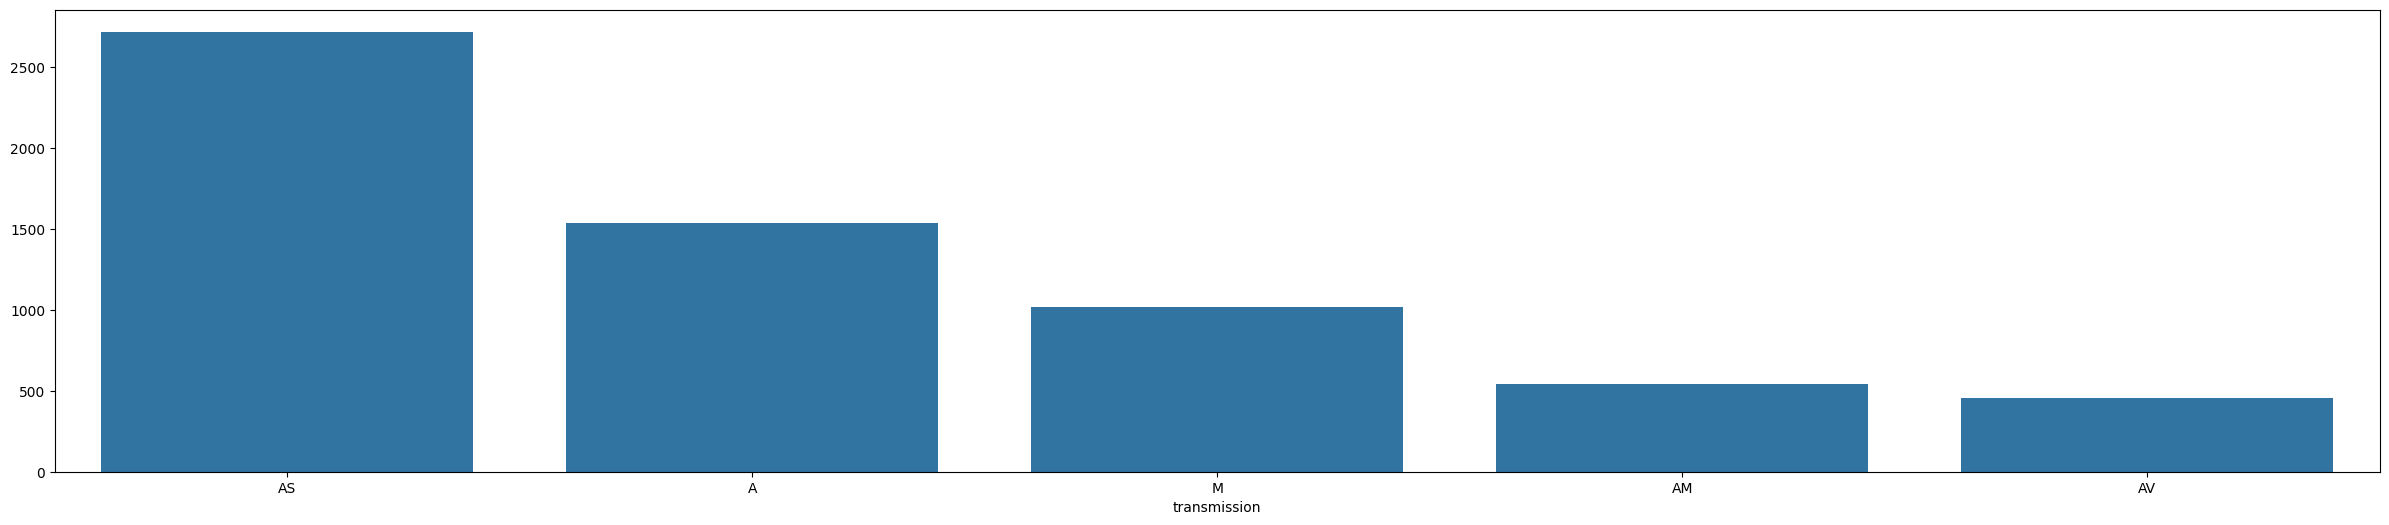

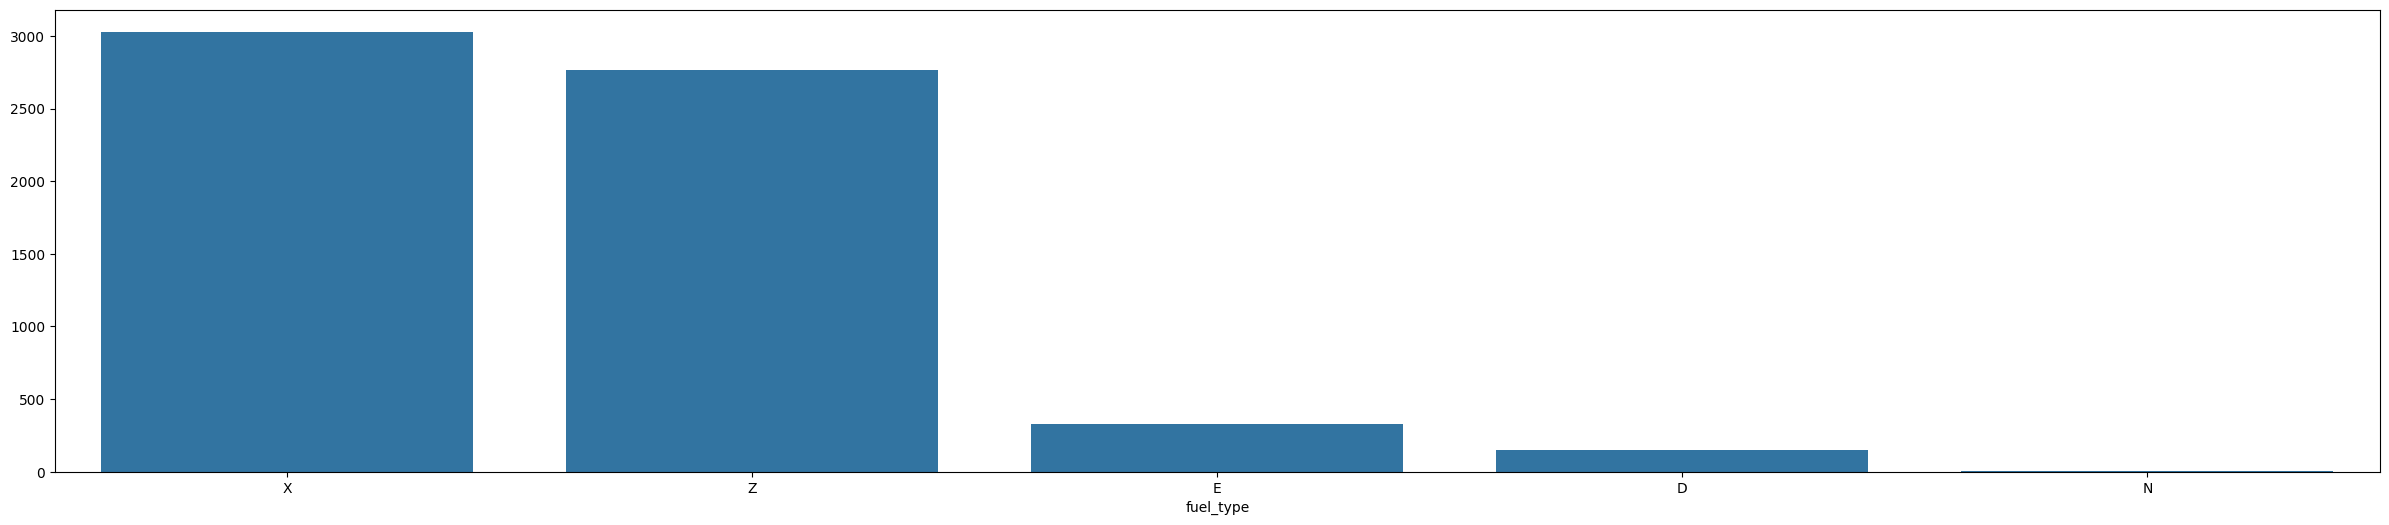

In [18]:
for column in objectData:
    plt.figure(figsize=(30, 6))
    value_counts = data[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)

In [19]:
objectColumns = data.select_dtypes(include=['object']).columns
objectColumns=objectColumns.drop('model')
objectColumns

Index(['make', 'vehicle_class', 'transmission', 'fuel_type'], dtype='object')

# Pie chart for object Data

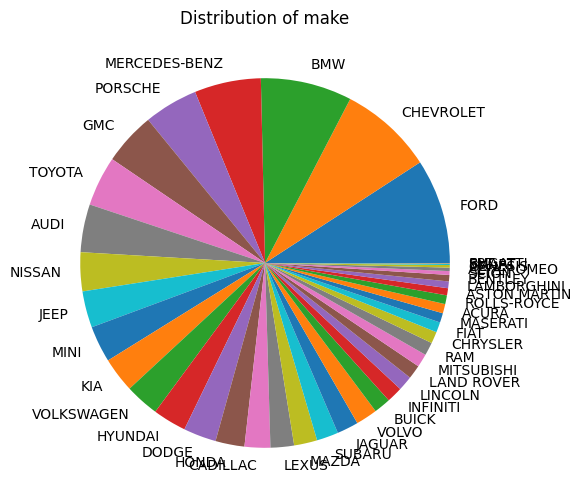

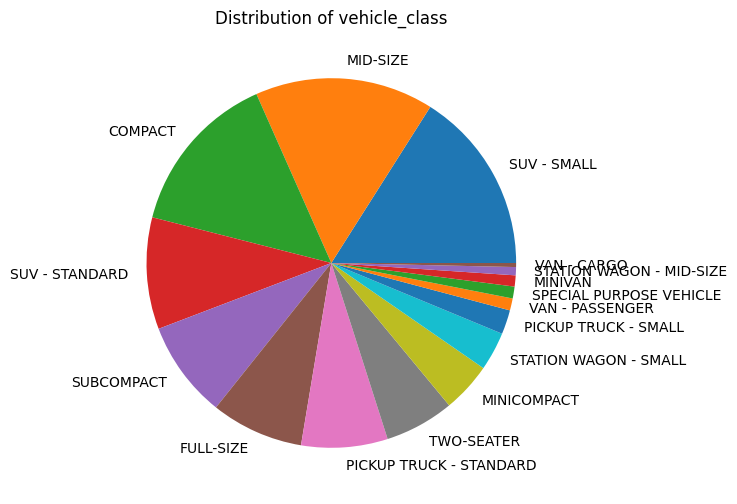

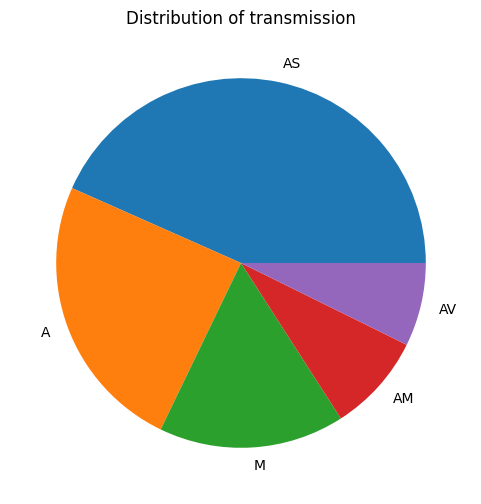

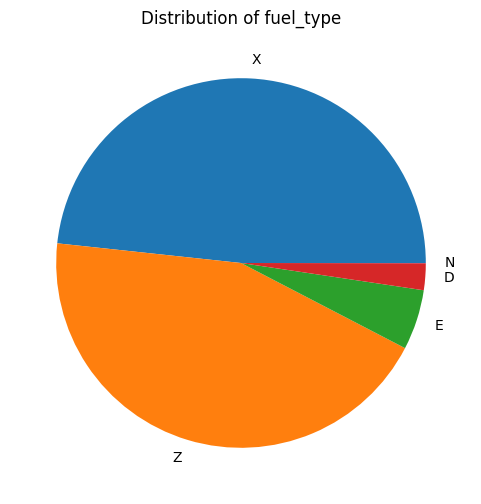

In [20]:
for column in objectColumns:
    objectCounts = data[column].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(objectCounts, labels=objectCounts.index)
    plt.title(f'Distribution of {column}')
    plt.show()

# Barchart for numeric data

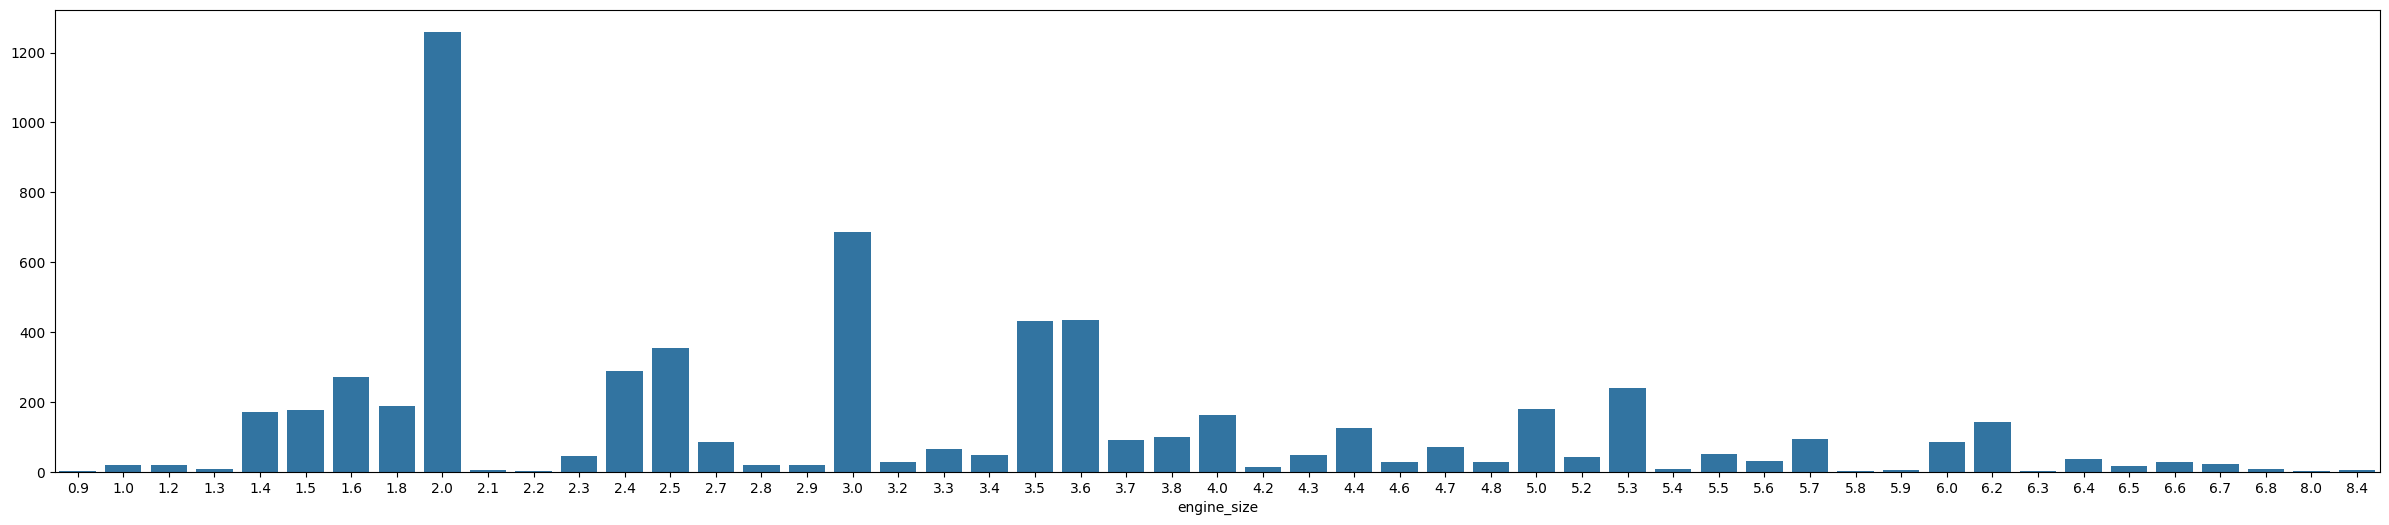

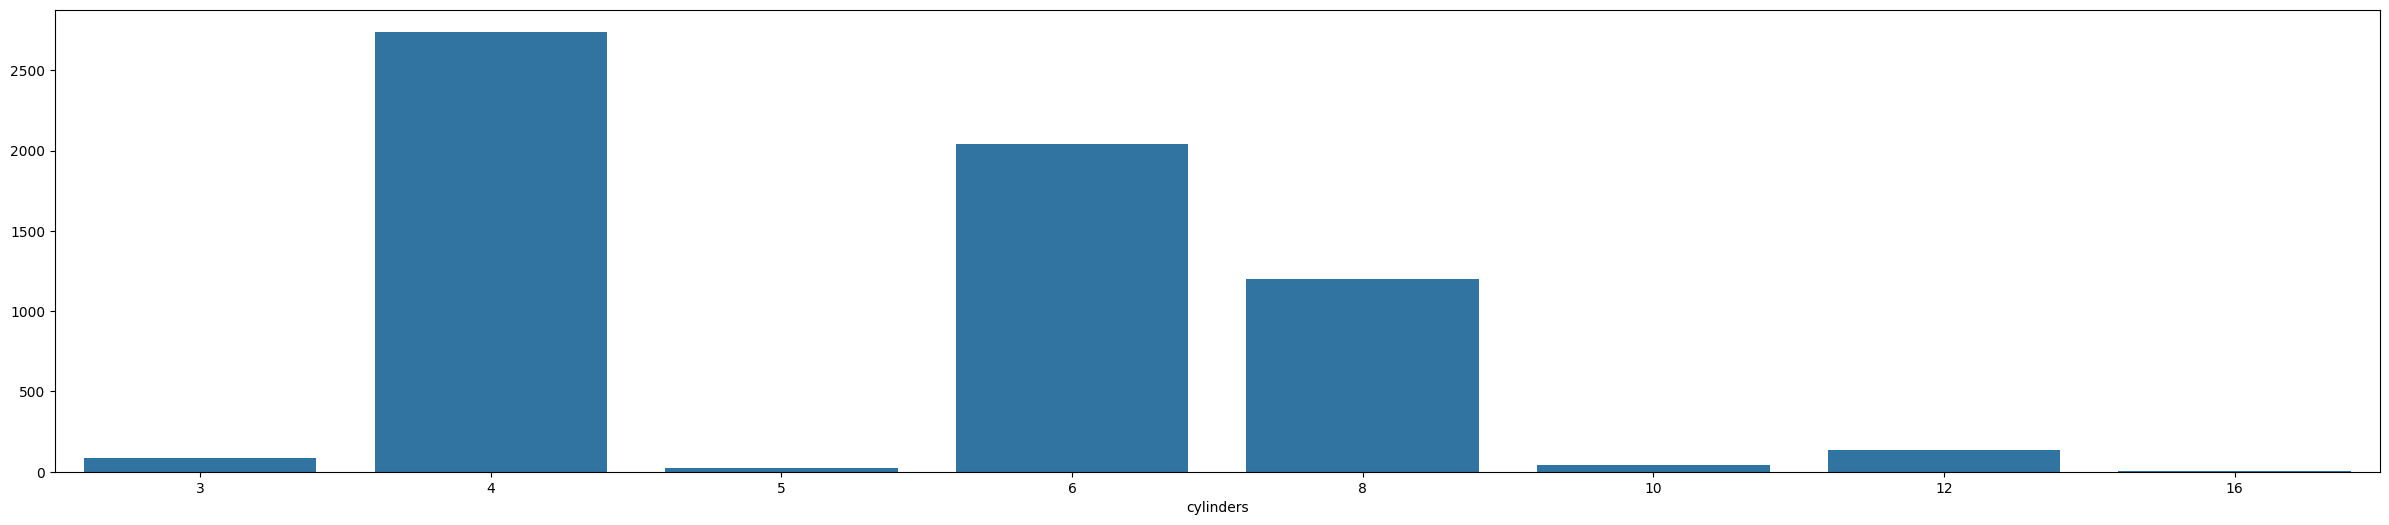

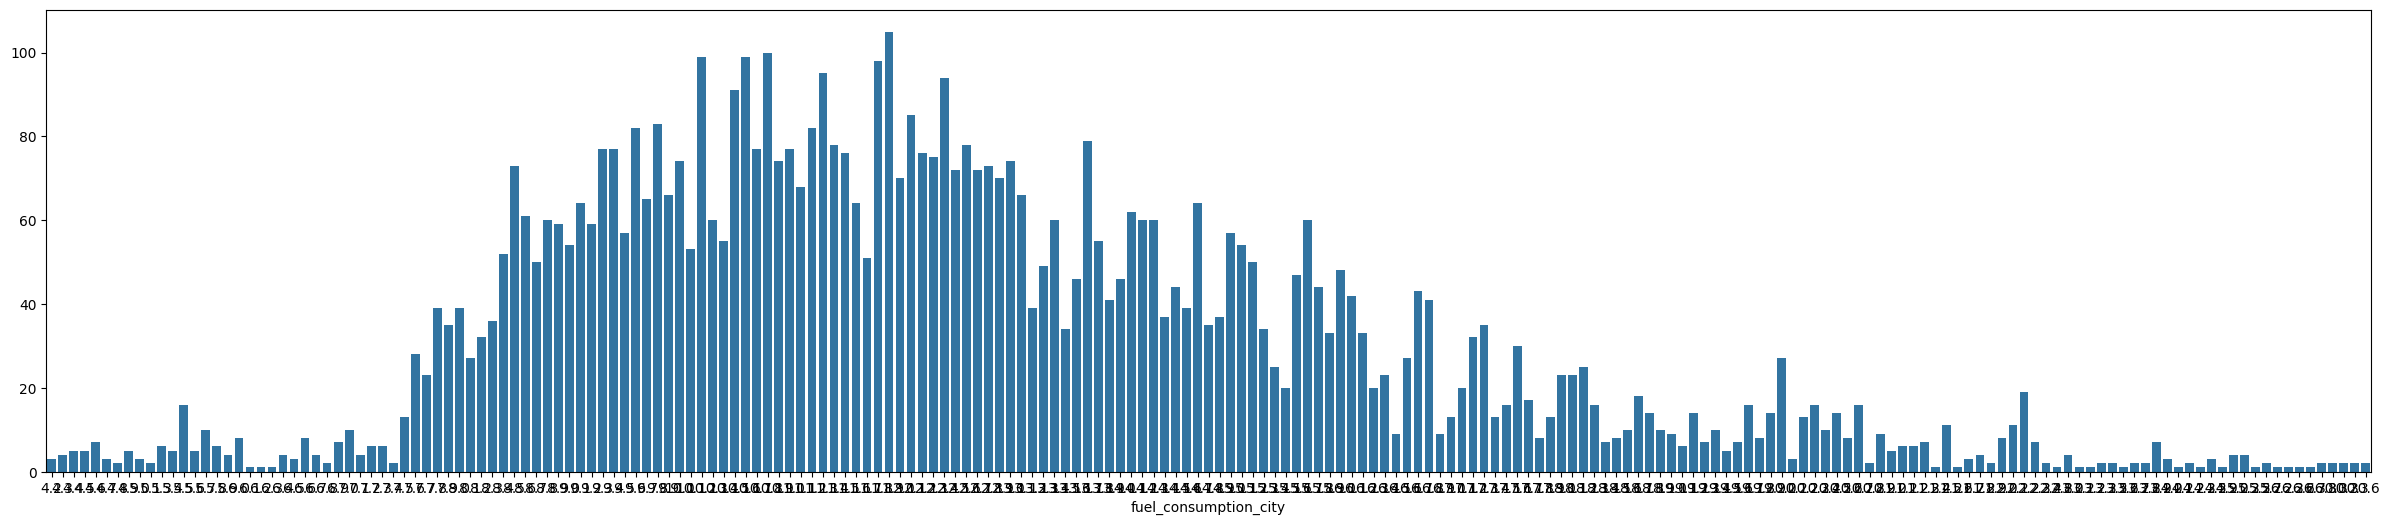

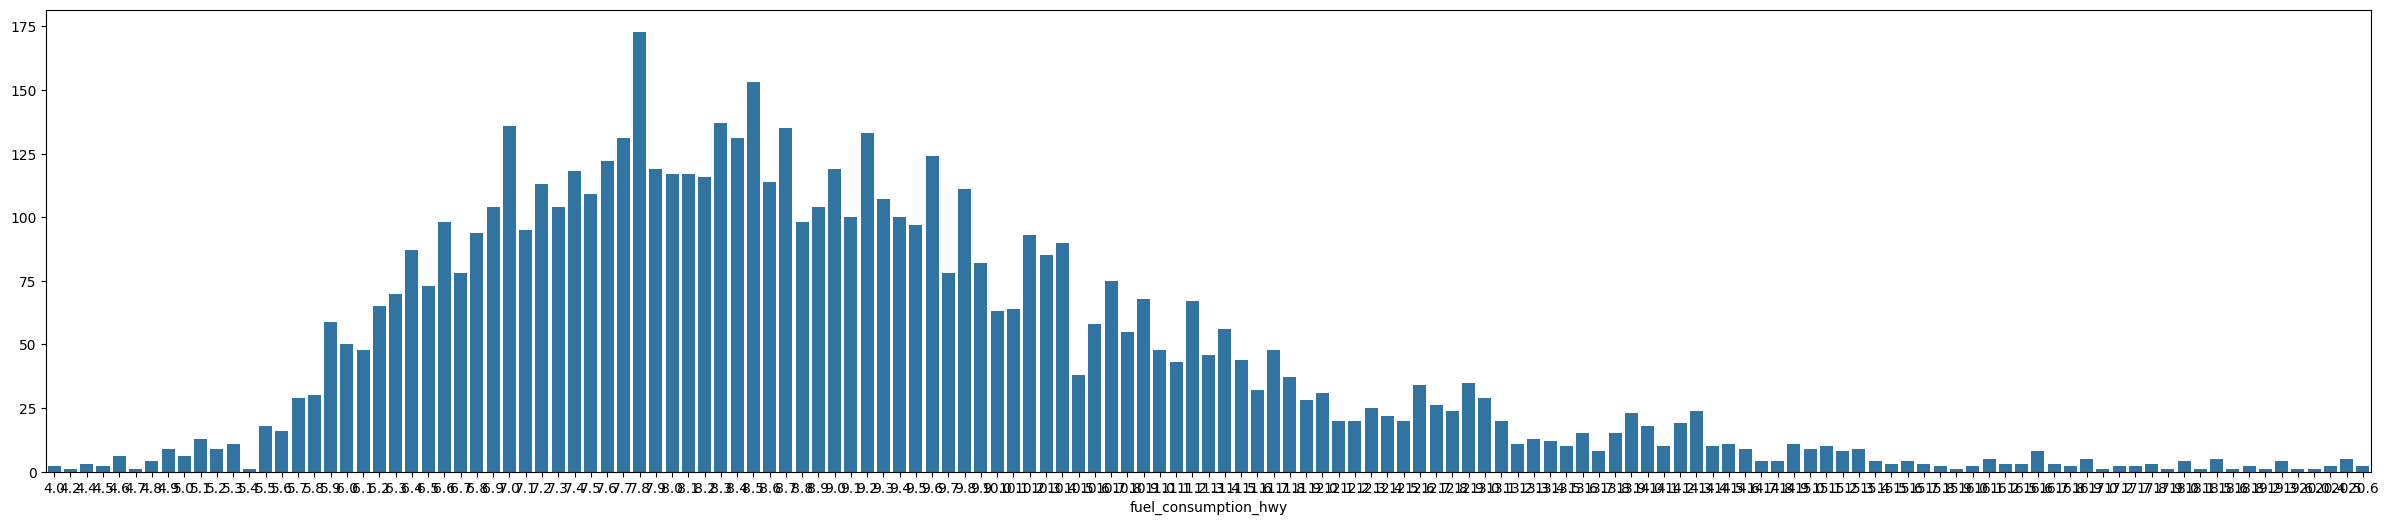

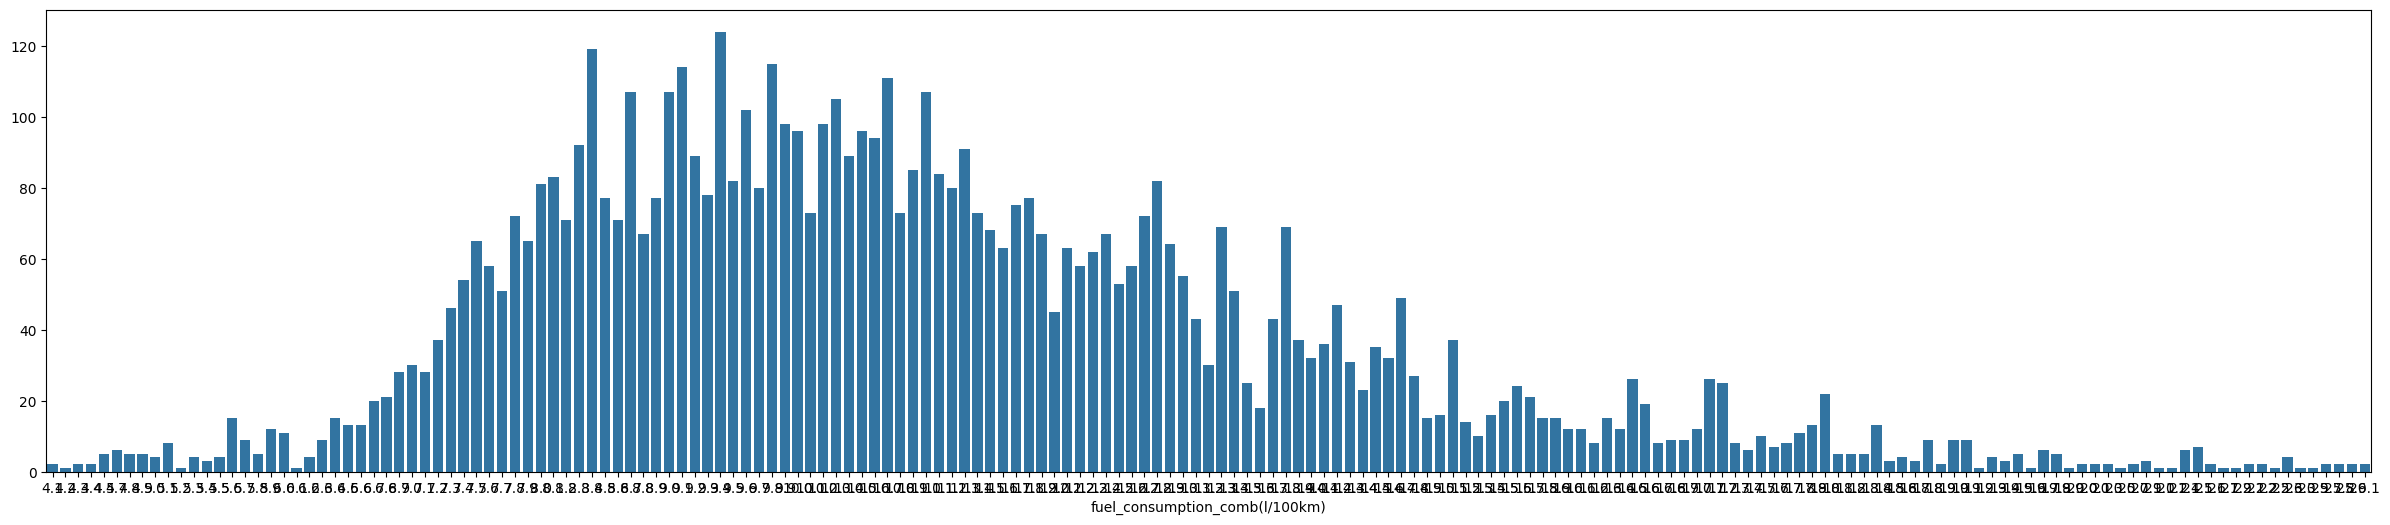

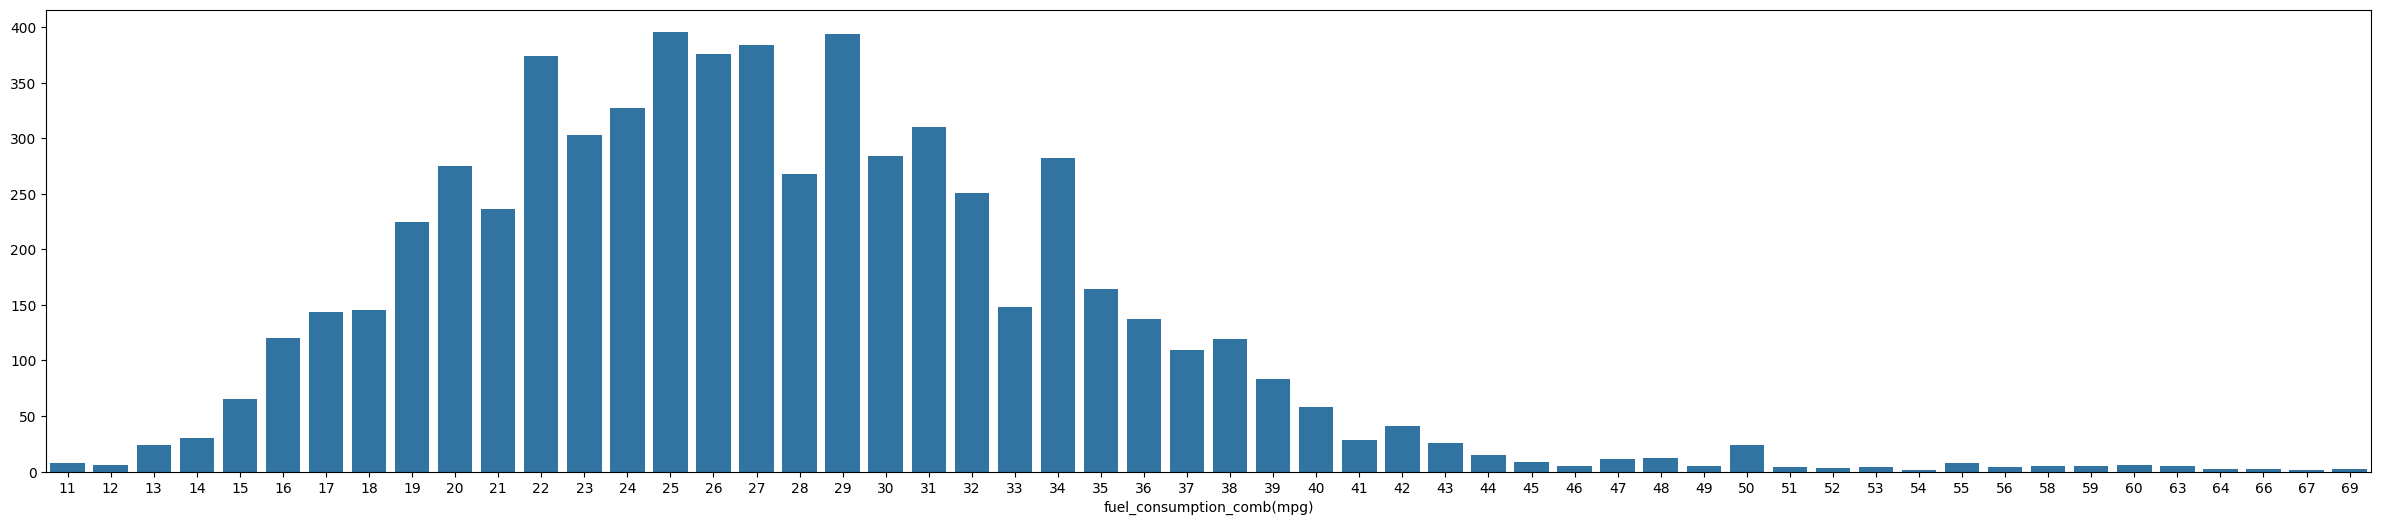

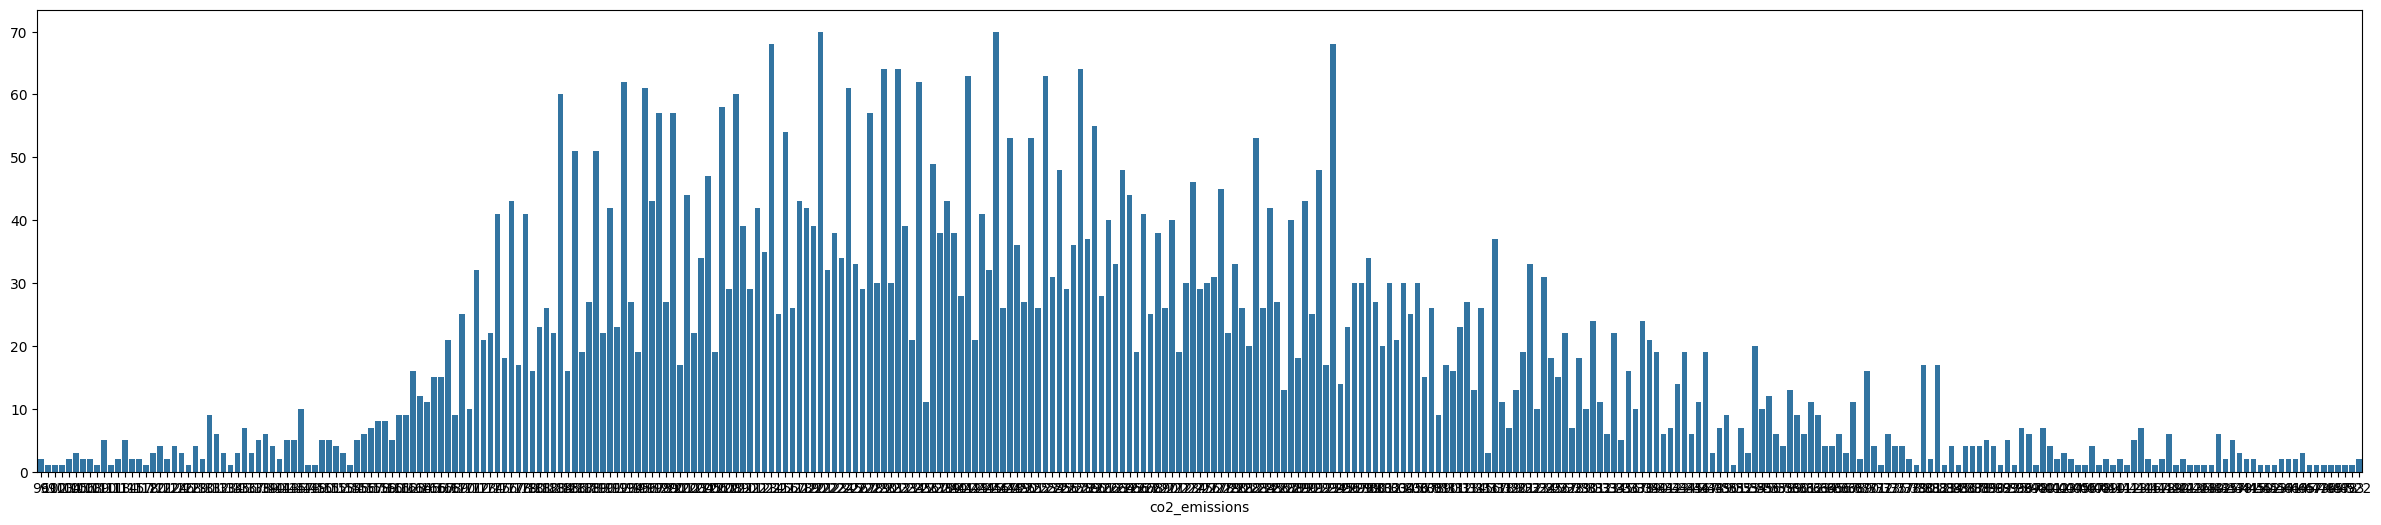

In [21]:
for column in numericData:
    plt.figure(figsize=(30, 6))
    value_counts = data[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)

# Heatmap for numeric data analysis

<Axes: >

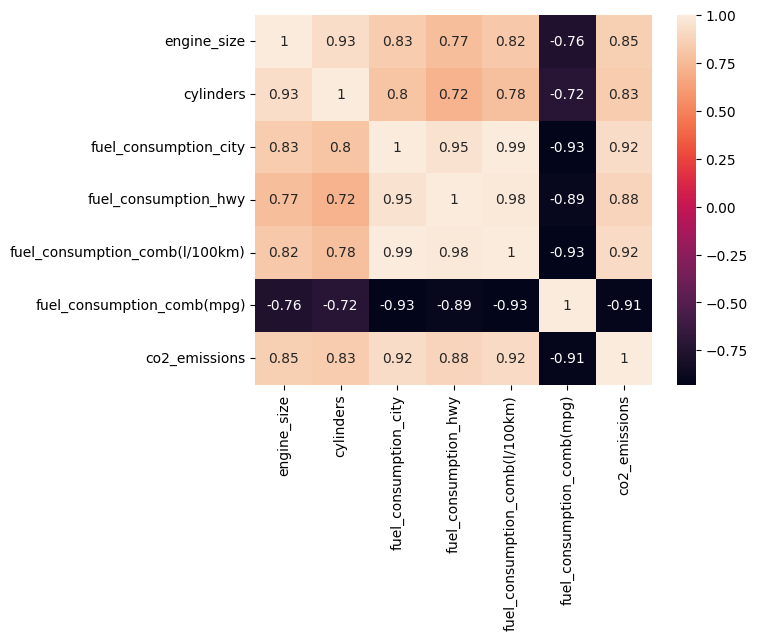

In [22]:
sns.heatmap(numericData.corr(), annot=True)

# Before Standardization

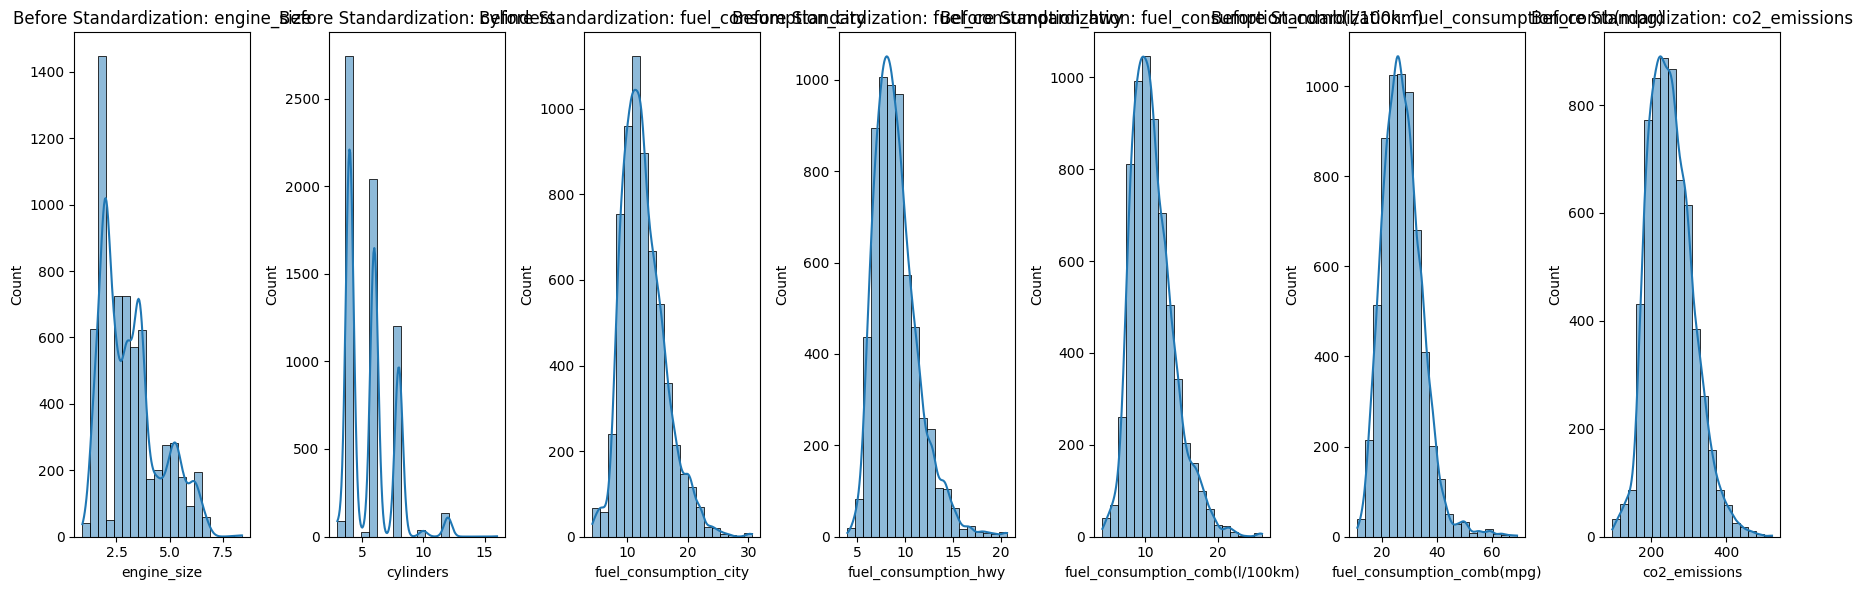

In [23]:
plt.figure(figsize=(18, 6))
for i, column in enumerate(numericData.columns, 1):
    plt.subplot(1, len(numericData.columns), i)
    sns.histplot(numericData[column], kde=True, bins=20)
    plt.title(f'Before Standardization: {column}')
plt.tight_layout()
plt.show()

# Standardize the numerical columns using Z-score

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
df_standardized = data.copy()
df_standardized[numericData.columns] = scaler.fit_transform(numericData)

# After Standaardization

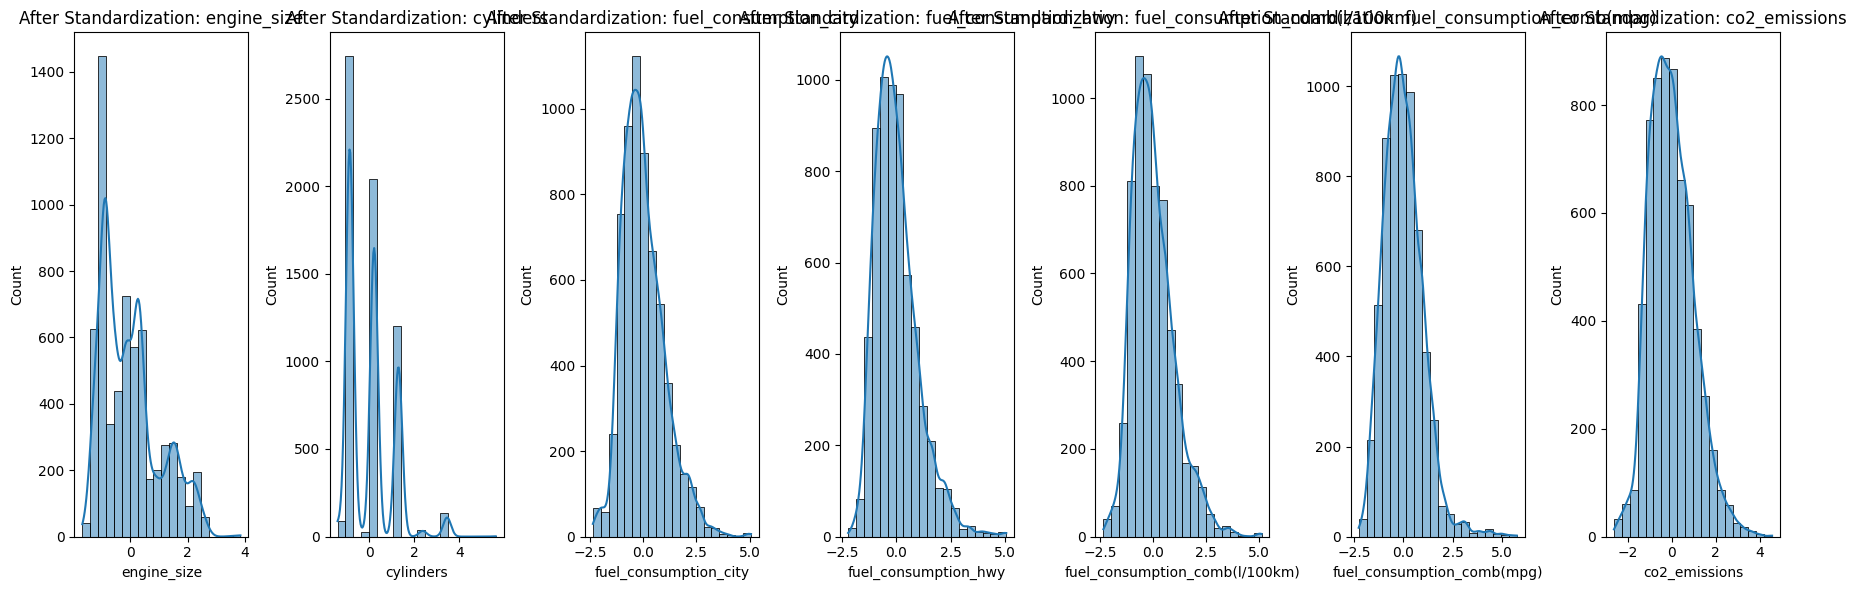

In [26]:
plt.figure(figsize=(18, 6))
for i, column in enumerate(numericData.columns, 1):
    plt.subplot(1, len(numericData.columns), i)
    sns.histplot(df_standardized[column], kde=True, bins=20)
    plt.title(f'After Standardization: {column}')
plt.tight_layout()
plt.show()

In [27]:
for column in numericData.columns:
    original_mean = numericData[column].mean()
    original_std = numericData[column].std()
    standardized_mean = df_standardized[column].mean()
    standardized_std = df_standardized[column].std()
    print(f"\n{column}:")
    print(f"  Before Standardization -> Mean: {original_mean}, Std Dev: {original_std}")
    print(f"  After Standardization -> Mean: {standardized_mean}, Std Dev: {standardized_std}")


engine_size:
  Before Standardization -> Mean: 3.1630001594133588, Std Dev: 1.365294032828746
  After Standardization -> Mean: 5.436960197112197e-17, Std Dev: 1.000079716210418

cylinders:
  Before Standardization -> Mean: 5.62059620596206, Std Dev: 1.8464242094704324
  After Standardization -> Mean: -9.288140336733336e-17, Std Dev: 1.000079716210418

fuel_consumption_city:
  Before Standardization -> Mean: 12.615590626494502, Std Dev: 3.550571580995709
  After Standardization -> Mean: -4.0324121461915457e-16, Std Dev: 1.000079716210418

fuel_consumption_hwy:
  Before Standardization -> Mean: 9.07342579308146, Std Dev: 2.2778925908754957
  After Standardization -> Mean: -5.436960197112197e-17, Std Dev: 1.000079716210418

fuel_consumption_comb(l/100km):
  Before Standardization -> Mean: 11.022110632871037, Std Dev: 2.945028435056974
  After Standardization -> Mean: -8.200748297310897e-16, Std Dev: 1.000079716210418

fuel_consumption_comb(mpg):
  Before Standardization -> Mean: 27.39502

# Histograph for co2 Emission

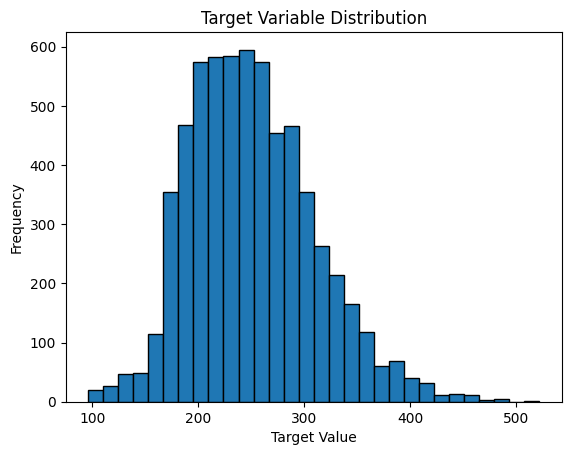

In [28]:
plt.hist(data['co2_emissions'], bins=30, edgecolor='black')
plt.title("Target Variable Distribution")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

# Skewness and kurtosis for CO2 Emissions

In [29]:
print("Skewness:", data['co2_emissions'].skew())
print("Kurtosis:", data['co2_emissions'].kurt())

Skewness: 0.5588650833129282
Kurtosis: 0.44397799715675124


# Skewness is 0.5 so it is normal distribution
# Kurtosis is 0.4 so there are less extreme outliers

# Model Building
# For predicting emissions: Gradient Boosting (XGBoost, LightGBM)if accuracy is the priority.
# For classifying emissions levels: Decision Trees for interpretability.
# For time-based trends: LSTM
# For grouping cars based on emissions: K-Means Clustering

# Predicting emissions

In [30]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [31]:
X = data.drop(columns=['co2_emissions','make','model','vehicle_class','transmission','fuel_type'])  
y = data['co2_emissions']  

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# XGBOOST

In [34]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# LGBOOST

In [35]:
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 566
[LightGBM] [Info] Number of data points in the train set: 5018, number of used features: 6
[LightGBM] [Info] Start training from score 250.541849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

C:\Users\revan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\revan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [36]:
xgb_mae = mean_absolute_error(y_test, xgb_pred)
lgb_mae = mean_absolute_error(y_test, lgb_pred)

In [37]:
xgb_mae

5.707462310791016

In [38]:
lgb_mae

5.952583864620798

# The Value for XGBOOST is '5.707462310791016'
# The Value for LGBOOST is '5.952583864620798'

# Classifying emissions

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [40]:
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [41]:
y_pred = tree_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

13.759545459624464

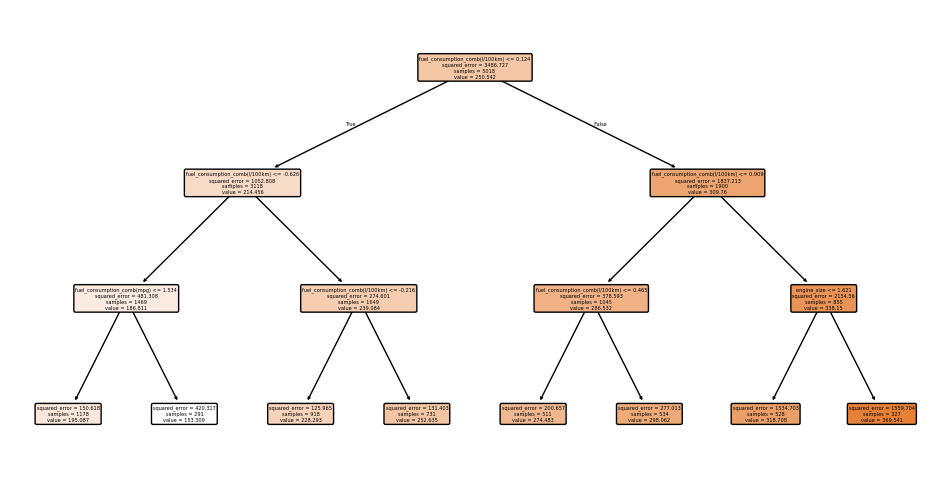

In [42]:
plt.figure(figsize=(12,6))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

# Decision tree interpretability value '13.759545459624464'

# Time based Trends

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Feature Scaling

In [44]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['co2_emissions']])

In [45]:
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [46]:
seq_length = 10
X, y = create_sequences(scaled_data, seq_length)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]

In [47]:
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

C:\Users\revan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1613
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1206
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0838
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0281
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0315
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0212
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0202 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0218
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0224
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0203
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0243
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0234
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0221 
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0214
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0199
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━

In [50]:
y_pred = model.predict(X_test)
y_pred

193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.43445987],
       [0.4369446 ],
       [0.4384339 ],
       ...,
       [0.3721351 ],
       [0.37760025],
       [0.38391173]], dtype=float32)

In [51]:
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

In [55]:
y_test


array([[292.],
       [292.],
       [356.],
       ...,
       [240.],
       [232.],
       [248.]])

In [56]:
y_pred

array([[281.0799 ],
       [282.1384 ],
       [282.77283],
       ...,
       [254.52956],
       [256.8577 ],
       [259.5464 ]], dtype=float32)

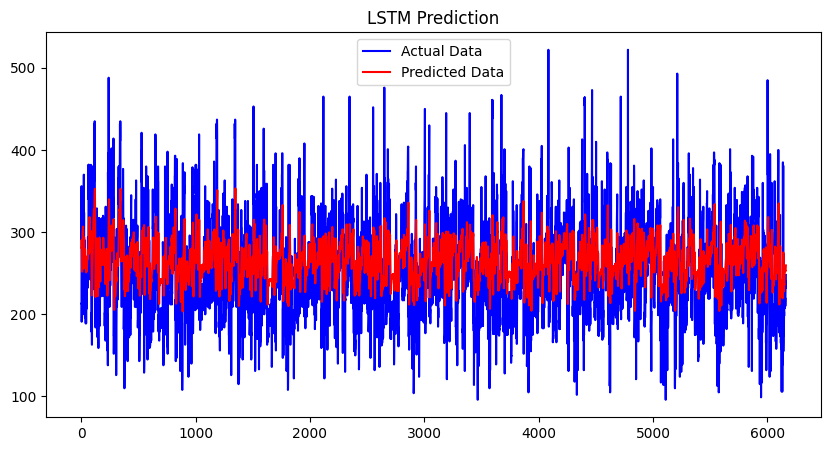

In [57]:
plt.figure(figsize=(10,5))
plt.plot(y_test, label="Actual Data", color='blue')
plt.plot(y_pred, label="Predicted Data", color='red')
plt.legend()
plt.title("LSTM Prediction")
plt.show()

# Grouping based on emissions

In [58]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [59]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [60]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [61]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

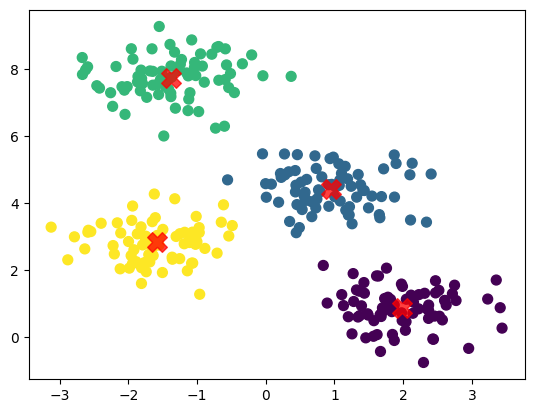

In [62]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.show()